In [3]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [14]:
df = pd.read_csv('../thesisgenerator/coverage_stats.csv', index_col=0).convert_objects(convert_numeric=True)

In [15]:
df.head()

,1-GRAM_count_total,1-GRAM_count_weighted,AN_count_total,CONJ_count_total,DET_count_total,EMPTY_count_total,J_count_in_labelled,J_count_total,J_count_weighted,NN_count_total,...,V_count_weighted,param_algorithm,param_avg,param_composer,param_dimensionality,param_id,param_reorder,param_rep,param_unlabelled,param_unlabelled_percentage
0,250285,15986200,462555,NaN,NaN,9,61874,61874,1441270,490333,...,940961,random_vect,False,random_vect,NaN,2,False,0,NaN,NaN
1,28215,13715179,245529,NaN,NaN,NaN,3590,4449,1058572,248071,...,758579,count_dependencies,False,Add,100,3,False,0,gigaw,100
2,28215,13715179,245529,NaN,NaN,NaN,3590,4449,1058572,248071,...,758579,count_dependencies,False,Mult,100,4,False,0,gigaw,100
3,28215,13715179,320643,NaN,NaN,1,3590,4449,1211428,337820,...,896349,count_dependencies,False,Left,100,5,False,0,gigaw,100
4,28215,13715179,359188,NaN,NaN,1,3590,4449,1248523,356425,...,795462,count_dependencies,False,Right,100,6,False,0,gigaw,100


In [17]:
ddf = df.query('param_composer=="Add" & param_algorithm=="word2vec" & param_unlabelled=="wiki"')

In [20]:
ddf = ddf.sort('param_unlabelled_percentage')

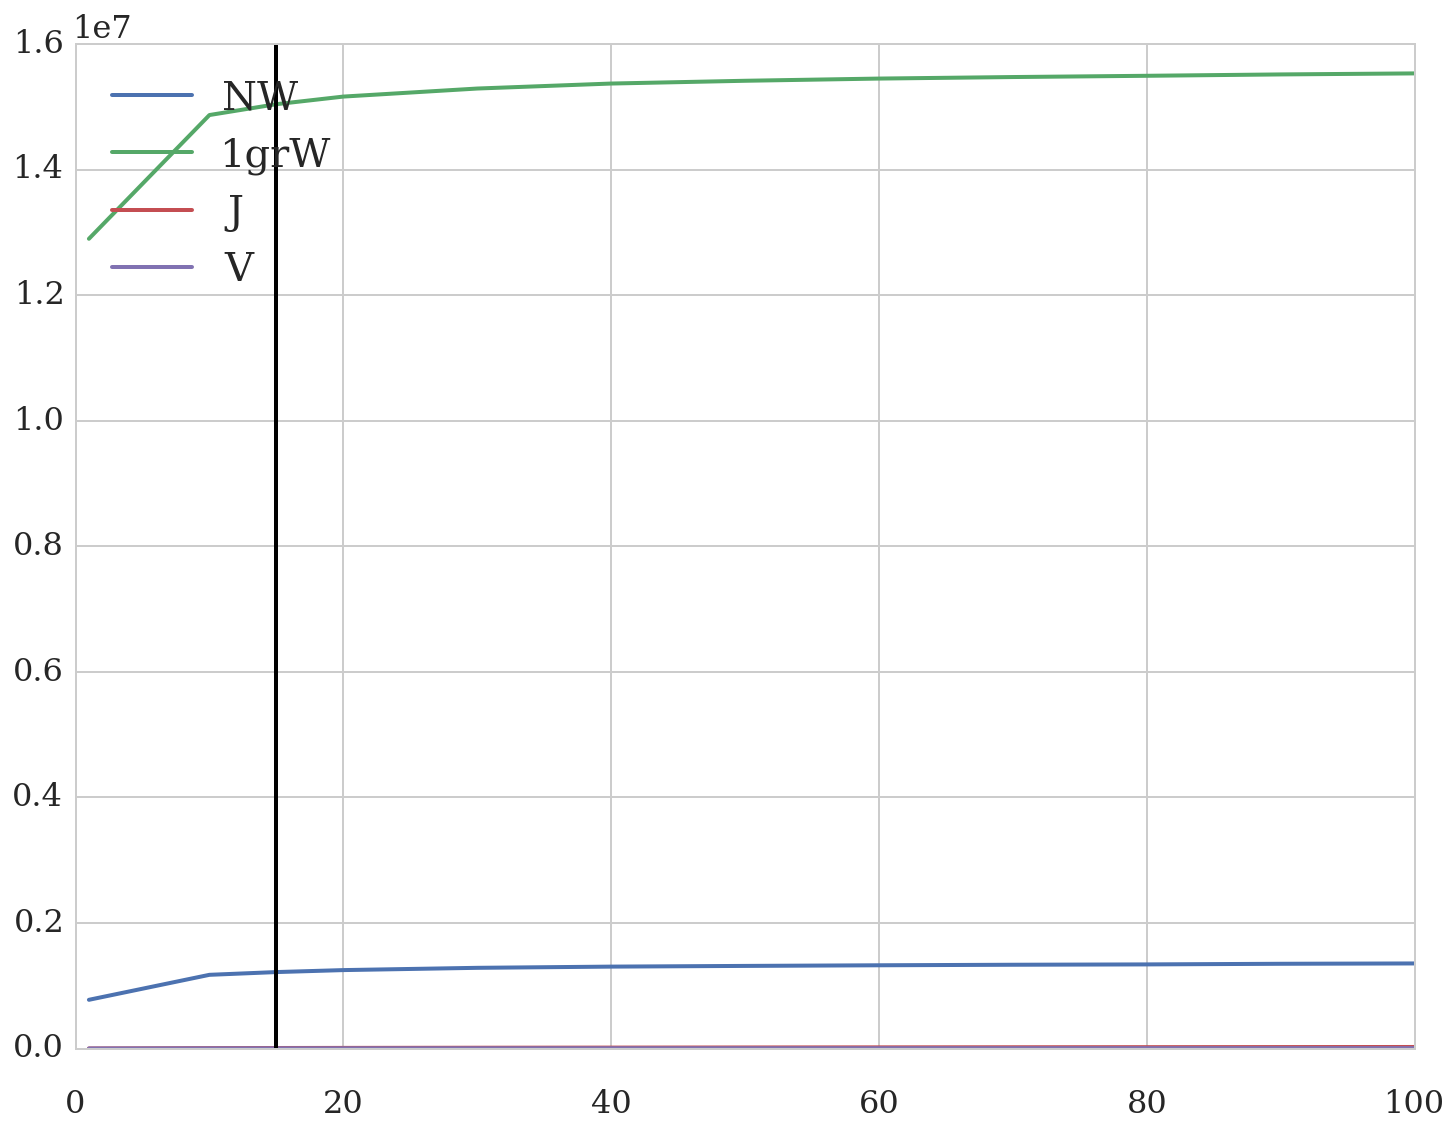

In [53]:
# plt.plot(ddf.param_unlabelled_percentage, ddf.AN_count_total, label='AN')
# plt.plot(ddf.param_unlabelled_percentage, ddf.NN_count_total, label='NN')
# plt.plot(ddf.param_unlabelled_percentage, ddf.N_count_total, label='N')
plt.plot(ddf.param_unlabelled_percentage, ddf.N_count_weighted, label='NW')
plt.plot(ddf.param_unlabelled_percentage, ddf['1-GRAM_count_weighted'], label='1grW')
# plt.plot(ddf.param_unlabelled_percentage, ddf['1-GRAM_count_total'], label='1gr')
plt.plot(ddf.param_unlabelled_percentage, ddf.J_count_total, label='J')

plt.plot(ddf.param_unlabelled_percentage, ddf.V_count_total, label='V')
# plt.plot(ddf.param_unlabelled_percentage, ddf.V_count_weighted, label='VW')
plt.axvline(15, c='k')
plt.legend(loc='upper left')

In [25]:
plt.legend?